In [1]:
from qiskit import*
from qiskit.tools.visualization import*
from numpy import*
from matplotlib.pyplot import*

In [2]:
qr=QuantumRegister(2,name='qr')
anci=QuantumRegister(3,name='anci')
cr=ClassicalRegister(2,name='cr')


In [15]:
qc=QuantumCircuit(qr,anci,cr)
backend=BasicAer.get_backend('qasm_simulator')
def circuit(a):
    qc.cx(qr[0],anci[0])
    qc.x(anci[0])
    qc.cu(a,-pi/2,pi/2,0,anci[0],qr[0])
    qc.x(anci[0])
    qc.cx(anci[0],qr[0])
    qc.cx(qr[0],anci[2])
    qc.x(anci[2])
    qc.h(anci[2])
    qc.h(qr[1])
    qc.cx(qr[1],anci[2])
    qc.h(qr[1])
    qc.h(anci[2])
    qc.x(anci[2])
    qc.x(anci[0])
    qc.cu(a,-pi/2,pi/2,0,anci[0],qr[1])
    qc.x(anci[0])
    qc.cx(qr[0],qr[1])
    qc.h(anci[2])
    qc.cx(anci[2],qr[1])
    qc.cx(anci[2],qr[0])
    qc.h(anci[2])
    qc.ch(anci[2],qr[0])
    qc.barrier()
    qc.measure(0,0)
    qc.measure(1,1)
    
#qc.draw(output='mpl')

In [14]:
circuit(0.3)

qc.draw()

┌───────────────────┐     ┌───┐                         »
  qr_0: ──■───────┤ U(0.3,-π/2,π/2,0) ├─────┤ X ├──■──────────────────────»
          │  ┌───┐└─────────┬─────────┘     └─┬─┘  │                 ┌───┐»
  qr_1: ──┼──┤ H ├──────────┼─────────────────┼────┼──────────────■──┤ H ├»
        ┌─┴─┐├───┤          │          ┌───┐  │    │  ┌───┐       │  └───┘»
anci_0: ┤ X ├┤ X ├──────────■──────────┤ X ├──■────┼──┤ X ├───────┼───────»
        └───┘└───┘                     └───┘       │  └───┘       │       »
anci_1: ───────────────────────────────────────────┼──────────────┼───────»
                                                 ┌─┴─┐┌───┐┌───┐┌─┴─┐┌───┐»
anci_2: ─────────────────────────────────────────┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├»
                                                 └───┘└───┘└───┘└───┘└───┘»
  cr: 2/══════════════════════════════════════════════════════════════════»
                                                                          »
«                                       ┌───┐     ┌───┐ ░ ┌─┐   
«  qr_0: ───────────────────────■───────┤ X ├─────┤ H ├─░─┤M├───
«        ┌───────────────────┐┌─┴─┐┌───┐└─┬─┘     └─┬─┘ ░ └╥┘┌─┐
«  qr_1: ┤ U(0.3,-π/2,π/2,0) ├┤ X ├┤ X ├──┼─────────┼───░──╫─┤M├
«        └─────────┬─────────┘├───┤└─┬─┘  │         │   ░  ║ └╥┘
«anci_0: ──────────■──────────┤ X ├──┼────┼─────────┼───░──╫──╫─
«                             └───┘  │    │         │   ░  ║  ║ 
«anci_1: ────────────────────────────┼────┼─────────┼───░──╫──╫─
«                ┌───┐        ┌───┐  │    │  ┌───┐  │   ░  ║  ║ 
«anci_2: ────────┤ X ├────────┤ H ├──■────■──┤ H ├──■───░──╫──╫─
«                └───┘        └───┘          └───┘      ░  ║  ║ 
«  cr: 2/══════════════════════════════════════════════════╩══╩═
«                                                          0  1

In [4]:
t=arange(0,0.005,0.001)
w=1
phi=0
m=1
def f(t):
    A=1
    return((A*cos(w*t + phi))/sqrt(2*m))
print(t)

[0.    0.001 0.002 0.003 0.004]


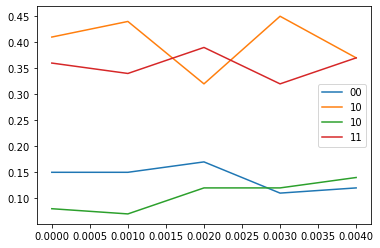

In [5]:
p=[]
q=[]
r=[]
s=[]
theta=[b*f(b) for b in t]

for a in theta:
    circuit(a)
    counts=execute(qc,backend,shots=100).result().get_counts()
    p.append(counts['00']/100)
    q.append(counts['01']/100)
    s.append(counts['10']/100)
    r.append(counts['11']/100)
    qc.reset(qr)
    qc.reset(anci)
plot(t,p,label='00')
plot(t,q,label='10')
plot(t,r,label='10')
plot(t,s,label='11')
legend()

In [6]:
from qiskit import IBMQ

In [7]:
IBMQ.save_account('6114b45e9dd9c373eb048c896b4eefd4b6e3e483414883c7bede8ecb41fa1e7de10c37d1f9bdea0b9d7be26d52b89adb48ef2c5c5b07afc8d407bea6347d9b28')



configrc.store_credentials:WARNING:2021-02-17 19:25:26,637: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
overwrite=True

In [7]:
IBMQ.load_account()

/home/nav/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
#from qiskit.providers.ibmq import least_busy
provider=IBMQ.get_provider(hub='ibm-q')
"""backend= least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
print(backend)                    """

'backend= least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))\nprint(backend)                    '

In [23]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 5 and
                                   not b.configuration().simulator and b.status().operational==True))



In [24]:
p=[]
q=[]
r=[]
s=[]
a0=theta[0]
a1=theta[1]
a2=theta[2]
a3=theta[3]
a4=theta[4]

In [25]:
circuit(a0)
job_exp = execute(qc, backend=backend, shots=1024)

from qiskit.tools.monitor import job_monitor
job_monitor(job_exp)  # displays job status under cell
exp_result = job_exp.result()
counts = exp_result.get_counts(qc)
p.append(counts['00']/100)
q.append(counts['01']/100)
s.append(counts['10']/100)
r.append(counts['11']/100)

Job Status: job has successfully run


account._job_result_object_storage:WARNING:2021-02-17 21:07:33,739: An error occurred while sending download completion acknowledgement: "HTTPSConnectionPool(host='api.quantum-computing.ibm.com', port=443): Read timed out. (read timeout=None)"


In [29]:
print(p)
print(q)
print(r)
print(s)

[2.8]
[2.51]
[2.4]
[2.53]


In [ ]:
circuit(a1)
job_exp = execute(qc, backend=backend, shots=1024)

from qiskit.tools.monitor import job_monitor
job_monitor(job_exp)  # displays job status under cell
exp_result = job_exp.result()
counts = exp_result.get_counts(qc)
p.append(counts['00']/100)
q.append(counts['01']/100)
s.append(counts['10']/100)
r.append(counts['11']/100)

In [39]:
circuit(a2)
job_exp = execute(qc, backend=backend, shots=1024)

from qiskit.tools.monitor import job_monitor
job_monitor(job_exp)  # displays job status under cell
exp_result = job_exp.result()
counts = exp_result.get_counts(qc)
p.append(counts['00']/100)
q.append(counts['01']/100)
s.append(counts['10']/100)
r.append(counts['11']/100)

AttributeError: 'str' object has no attribute 'properties'